In [135]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import plotly.express as px
import pyvista as pv

In [5]:
data = pd.read_parquet("/Users/arvinprince/pytorch-files/Google ASL/data/450474571.parquet")
data_1 = pd.read_parquet("/Users/arvinprince/pytorch-files/Google ASL/data/296317215.parquet")

In [19]:
data_1.head()

,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,z_right_hand_11,z_right_hand_12,z_right_hand_13,z_right_hand_14,z_right_hand_15,z_right_hand_16,z_right_hand_17,z_right_hand_18,z_right_hand_19,z_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
1494438637,0,0.558159,0.550603,0.554162,0.543828,0.551478,0.555103,0.566358,0.455327,0.572389,...,-0.124966,-0.113680,-0.103391,-0.118710,-0.091068,-0.071286,-0.095167,-0.091655,-0.064835,-0.046677
1494438637,1,0.559157,0.550627,0.554241,0.543452,0.551426,0.554883,0.565622,0.455519,0.571343,...,-0.101074,-0.092762,-0.083472,-0.102874,-0.077500,-0.058431,-0.076877,-0.079398,-0.056055,-0.039821
1494438637,2,0.555381,0.551183,0.554637,0.543676,0.551955,0.555277,0.565502,0.454227,0.570983,...,-0.139371,-0.124513,-0.095812,-0.131984,-0.104427,-0.075522,-0.096968,-0.116063,-0.090169,-0.064778
1494438637,3,0.557249,0.550174,0.553681,0.542862,0.550985,0.554343,0.564671,0.454935,0.570286,...,-0.187725,-0.179453,-0.133177,-0.173193,-0.143141,-0.115510,-0.135543,-0.150484,-0.123912,-0.102089
1494438637,4,0.557520,0.551252,0.554584,0.543844,0.552108,0.555526,0.566051,0.454531,0.571771,...,-0.167483,-0.152804,-0.127324,-0.171816,-0.133314,-0.097499,-0.145111,-0.160346,-0.122395,-0.090545


In [7]:
columns = data.columns

In [8]:
xy_cols = [z for z in columns if z[0] != "z"]

In [10]:
rel_data = data.loc[:, xy_cols]

In [11]:
rel_data.head()

,frame,x_face_0,x_face_1,x_face_2,x_face_3,x_face_4,x_face_5,x_face_6,x_face_7,x_face_8,...,y_right_hand_11,y_right_hand_12,y_right_hand_13,y_right_hand_14,y_right_hand_15,y_right_hand_16,y_right_hand_17,y_right_hand_18,y_right_hand_19,y_right_hand_20
sequence_id,,,,,,,,,,,,,,,,,,,,,
2138557488,0,0.663001,0.644330,0.657036,0.627135,0.640392,0.639885,0.641768,0.534376,0.636691,...,0.771913,0.815728,0.730819,0.693438,0.749792,0.796104,0.735482,0.662857,0.619258,0.577681
2138557488,1,0.667972,0.643810,0.656717,0.626106,0.639789,0.639204,0.640857,0.533343,0.635632,...,0.780482,0.834726,0.728836,0.702976,0.772514,0.825482,0.737005,0.658113,0.612368,0.570735
2138557488,2,0.671009,0.642717,0.655539,0.624751,0.638660,0.637980,0.639263,0.531785,0.634024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2138557488,3,0.668623,0.641970,0.654859,0.623967,0.637923,0.637240,0.638609,0.531507,0.633598,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2138557488,4,0.669397,0.647073,0.658502,0.627655,0.643198,0.642010,0.641524,0.526642,0.635745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# contour = dict(rel_data.iloc[0,:])
contour = dict(data.iloc[0,:])

x_contour = [contour[x] for x in contour.keys() if x[0] == "x"]
y_contour = [contour[y] for y in contour.keys() if y[0] == "y"]
z_contour = [contour[z] for z in contour.keys() if z[0] == "z"]

# xy_contour = tuple(zip(x_contour, y_contour))
xyz_contour = tuple(zip(x_contour, y_contour, z_contour))

plt.figure(figsize= (7,7))
# plt.scatter(x_contour, y_contour,s=4)
fig = px.scatter_3d(x= x_contour, y= y_contour, z= z_contour)
fig.update_traces(marker_size=4)
fig.show()
# plt.show()

<Figure size 700x700 with 0 Axes>

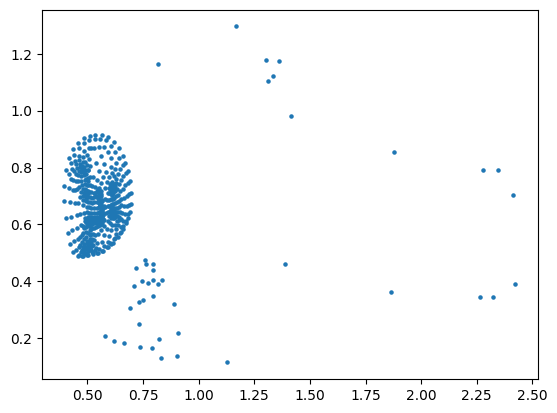

In [89]:
contour = dict(rel_data.iloc[0,:])
x_contour = [contour[x] for x in contour.keys() if x[0] == "x"]
y_contour = [contour[y] for y in contour.keys() if y[0] == "y"]
xy_contour = tuple(zip(x_contour, y_contour))

plt.scatter(y_contour, x_contour,s=5)
# fig = px.scatter_3d(x= x_contour, y= y_contour, z= z_contour)
# fig.update_traces(marker_size=4)
# fig.show()
plt.show()

In [132]:
contour = dict(data.iloc[0,:])
x_contour = [contour[x] for x in contour.keys() if x[:3] == "x_f"]
y_contour = [contour[y] for y in contour.keys() if y[:3] == "y_f"]
z_contour = [contour[z] for z in contour.keys() if z[:3] == "z_f"]

fig = plt.figure(figsize=(7,5))
# ax = plt.scatter(y_contour, x_contour,s=9)
ax = px.scatter_3d(x=x_contour, y=y_contour, z=z_contour)
ax.update_traces(marker_size=4)
ax.show()
# plt.show()

mesh_cords = list(zip(y_contour, x_contour, z_contour))

<Figure size 700x500 with 0 Axes>

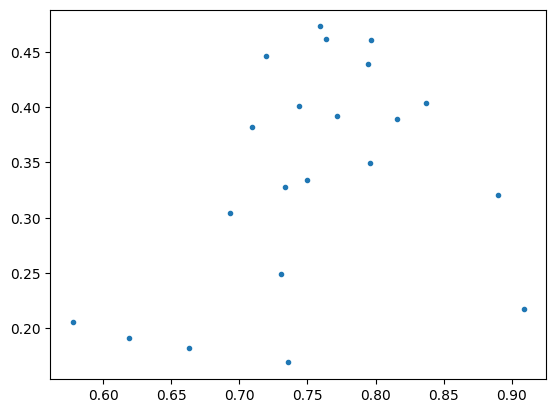

In [148]:
contour = dict(data.iloc[0,:])
x_contour = [contour[x] for x in contour.keys() if x[:3] == "x_r"]
y_contour = [contour[y] for y in contour.keys() if y[:3] == "y_r"]


plt.scatter(y_contour, x_contour,s=9)
plt.show()
# fig = px.scatter(x_contour, y_contour)
# fig.show()

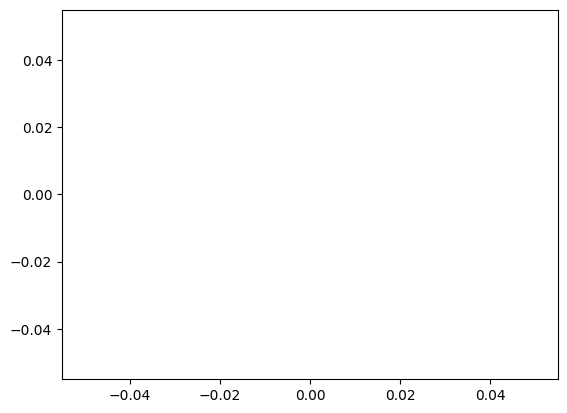

In [147]:
contour = dict(data.iloc[0,:])
x_contour = [contour[x] for x in contour.keys() if x[:3] == "x_l"]
y_contour = [contour[y] for y in contour.keys() if y[:3] == "y_l"]


plt.scatter(y_contour, x_contour,s=9)
plt.show()
# fig = px.scatter(x_contour, y_contour)
# fig.show()

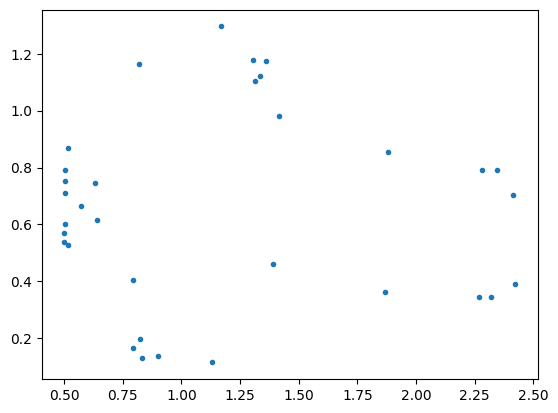

In [146]:
contour = dict(rel_data.iloc[0,:])
x_contour = [contour[x] for x in contour.keys() if x[:3] == "x_p"]
y_contour = [contour[y] for y in contour.keys() if y[:3] == "y_p"]
z_contour = [contour[z] for z in contour.keys() if z[:3] == "z_p"]

plt.scatter(y_contour, x_contour,s=9)
plt.show()
# fig = px.scatter(x_contour, y_contour)
# fig.show()